# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 7: Gordus 
## April 04, 2025

#  The Fourier Transform

For this lab, you will learn how to use fourier and inverse fourier transforms. This is a critical analytical step for not only X-ray crystallography, but also signal processing. Determining the 3D electron density map from X-ray crystallography requires 100s-1000s of diffraction patterns, so we will limit ourselves to just 1D and 2D problems.

The Fourier Transform is very useful for detecting the frequencies of oscillations that occur in a signal:

### Fourier Transform

![Fourier](https://wikimedia.org/api/rest_v1/media/math/render/svg/78c98b6f8d5527b42929344a3ad3de7bee5bfcaa)

Where f(x) is the signal, and Euler's formula is:

![Euler](https://wikimedia.org/api/rest_v1/media/math/render/svg/aab1fcd1a6db5cc6678bb9cbd871580eeeb86eda)

This transform is the integral of the product of the signal with a transform, which in this case is Euler's formula (i.e. a sum of wave phase-shifted wave functions). The result of this transform is a new function that is now a function of frequency (over space (x) or time (t)).

What does all of this mean? When you take the integral of a product, what you are essentially doing is calculating resonance. Over what parameter space do the two functions resonate with each other? The result of the integral will be positive over parameters (in this case, frequency) where the two functions resonate, and zero everywhere else. The transform essentially breaks down your signal into a sum of wave functions that resonate with your signal:

![FourierURL](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif "fourier")

Conversely, if you have transformed data in frequency space, and you want to covert it back to space (x) or time (t), you will use the Inverse Fourier Transform:

### Inverse Fourier Transform

![InverseFourier](https://wikimedia.org/api/rest_v1/media/math/render/svg/9b182002e69d633c3433092e8401ee2b0fcdd3b4)

In the problems below, we'll explore the properties of this transform, and how it helps us detect signal properties of data we may collect.


In [86]:
# These are the libraries you will need for this lab

import matplotlib.pyplot as plt
import numpy as np
import scipy.fft
from scipy.fft import irfft, rfft,rfftfreq


# Problem 1: 1D Fourier Analysis

# 1.a Sine Waves

Produce and plot 3 sine waves:

<img src="http://www.gordus.org/public_images/sin_waves.png" alt="Drawing" style="width: 250px;"/>

Where:

$\nu $ 1 = 27 Hz

$\nu $ 2 = 35 Hz

t = 1 second

sampling rate = 1000 Hz

(i.e. step_length for your time-array will be 0.001)

For this, you will use `np.sin( )`.

# <font color='red'>Student Input Cell: 5 points</font>   


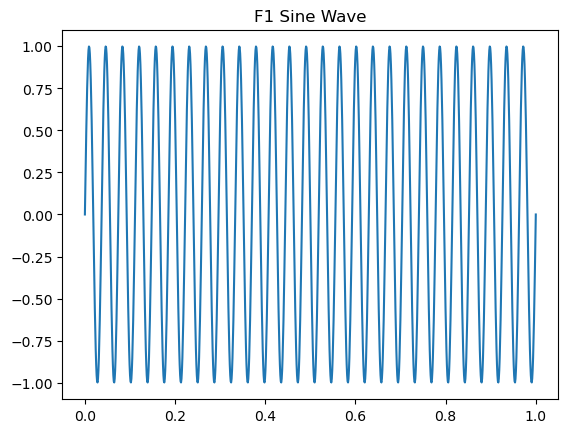

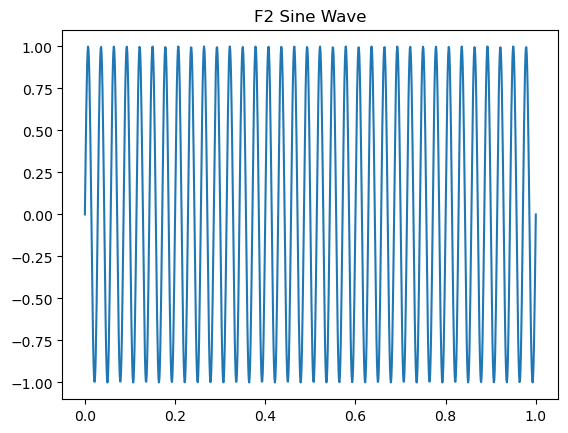

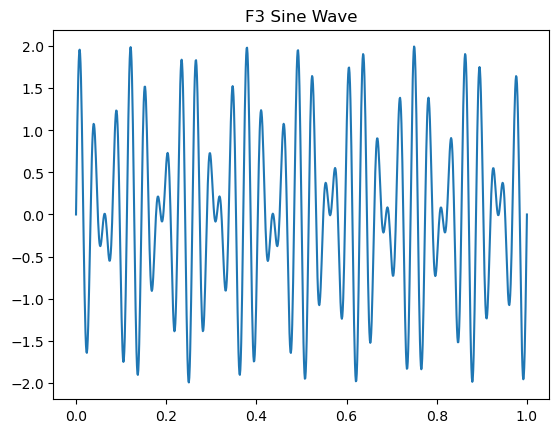

In [87]:
time_array = np.linspace(0,1,1000)
v1 = 27
v2 = 35

def f1(t):
    return np.sin(2*np.pi*v1*t)

def f2(t):
    return np.sin(2*np.pi*v2*t)

def f3(t):
    return f1(t) + f2(t)


plt.plot(time_array,f1(time_array))
plt.title("F1 Sine Wave")
plt.show()
plt.plot(time_array,f2(time_array))
plt.title("F2 Sine Wave")
plt.show()
plt.plot(time_array,f3(time_array))
plt.title("F3 Sine Wave")
plt.show()

# 1.b Noisy Waves

Don't those waves look beautiful? If only real data looked like that! Sadly, real data are often noisy, so let's add some noise:

<img src="http://www.gordus.org/public_images/sin_wave_noise.png" alt="Drawing" style="width: 250px;"/>


To create the noise component, use: `2.5*np.random.randn(len(t))`.

Create and plot your noisy wave profile for the f3(t).

# <font color='red'>Student Input Cell: 5 points</font>   

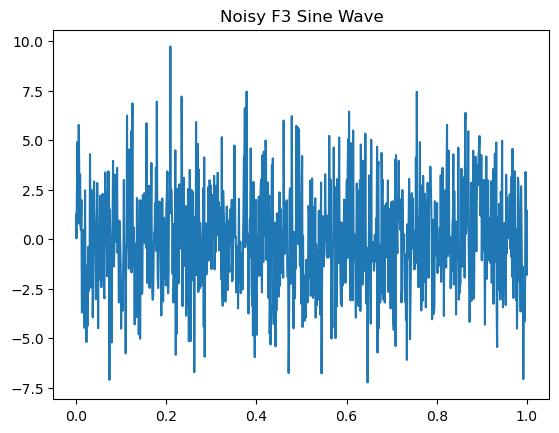

In [88]:
np.random.seed(42)
noise = 2.5*np.random.randn(len(time_array))
def noisy_f3(t):
    return f3(t) + noise

plt.plot(time_array,noisy_f3(time_array))
plt.title("Noisy F3 Sine Wave")
plt.show()

# 1.c Discrete Fourier Transform

The noisy signal looks pretty bad, right? Let's see if we can still detect your original frequencies. To do this, we'll use the Discrete Fourier Transform. The discrete version is just like the regular version, but it's a summation over discrete points in space and time (like our real data) rather than a continuous integral:

### Discrete Fourier Transform

![DFT](https://wikimedia.org/api/rest_v1/media/math/render/svg/f0b6c233908cd18ffdf6d0a77ab962194aad343a)

The actual function we'll use is something called the *Fast Fourier Transform* which takes advantage of some symmetry properties of the DFT. We're not going to cover this, but this fast version revolutionized digital signal processing, and made possible all sorts of analyses that were not feasible before.

To detect the frequencies in your noisy data, calculate the Fourier Transform of your data using the following:

**Fast Fourier Transform**

`y-axis   = rfft(noisy_data)`

The output provides both negative and positive frequencies. Convert this all to positive with:

`y-axis = np.abs(y-axis)`

For your x-axis (frequencies), use the following:

**Frequencies**

`n = len(Time)`

`x-axis = rfftfreq(n,step_length)`

### Plot x (frequencies) vs. y (Fourier amplitude).

# <font color='red'>Student Input Cell: 5 points</font>   

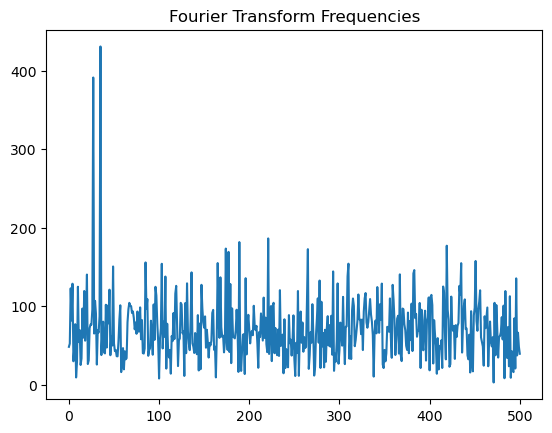

In [89]:
yaxis = np.abs(rfft(noisy_f3(time_array)))
xaxis = rfftfreq(len(time_array),0.001)

plt.plot(xaxis,yaxis)
plt.title("Fourier Transform Frequencies")
plt.show()

# 1.d Use Fourier Transform to clean up data

Despite how noisy the signal looked earlier, the Fourier Transform should have been able to provide you with some information about the underlying frequencies. Let's use this to clean up our data, and see if we can reproduce our original (clean) version of the signal.

To do this:

**Step 1: Set all y-axis data less than 300 to zero.**

**Step 2: Plot your new y-axis data.**

# <font color='red'>Student Input Cell: 5 points</font>   

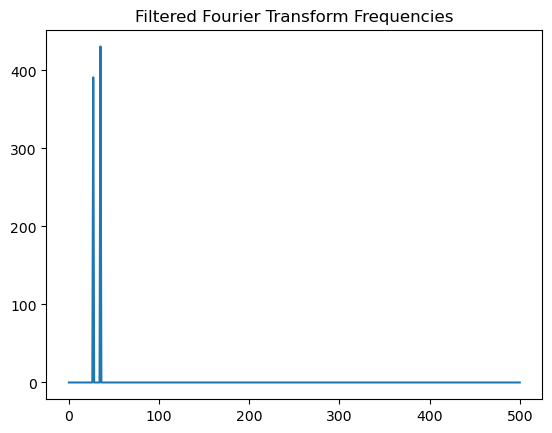

In [90]:
cleanyaxis = yaxis
cleanyaxis[cleanyaxis < 300] = 0

plt.plot(xaxis,cleanyaxis)
plt.title("Filtered Fourier Transform Frequencies")
plt.show()

# 1.e Use clean Fourier Transform to reproduce clean signal

Now that you have a 'clean' Fourier transform, you can use it to produce a clean signal without noise. To do this, use your clean y-axis data to produce a clean signal using the inverse Fourier transform:

`CleanSignal = irfft(clean_y_axis_signal)`

**Plot this clean signal in time, along with the original signal before you added the noise**

How do they compare?


# <font color='red'>Student Input Cell: 5 points</font>   

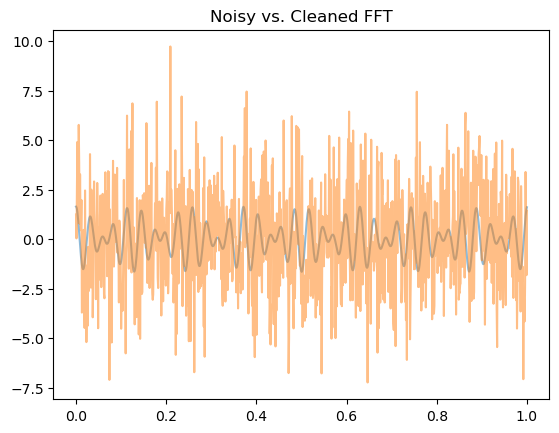

In [91]:
cleansignal = irfft(cleanyaxis)

plt.plot(time_array,cleansignal,alpha=0.5)
plt.plot(time_array,noisy_f3(time_array),alpha=0.5)
plt.title("Noisy vs. Cleaned FFT")
plt.show()

The noisy data cleary has the same oscillatory pattern as the fourier transformation, though the transformation much more clearly resembles the original sine wave.

# Problem 2: 2D Fourier Analysis

# 2.a 2D Sine Waves (Gratings)

For this problem, we'll work with waves over space instead of time. To create a 2D wave with $\lambda$ = 200, we'll use `meshgrid`.

Copy and paste this code in the cell below (easy 5 points!):

`x = np.arange(-500, 501, 1)`

`X, Y = np.meshgrid(x, x)`

`wavelength = 200`

`grating = np.sin(2 * np.pi * X / wavelength)`

`plt.set_cmap("gray")`

`plt.imshow(grating)`

`plt.show()`

# <font color='red'>Student Input Cell: 5 points</font>   

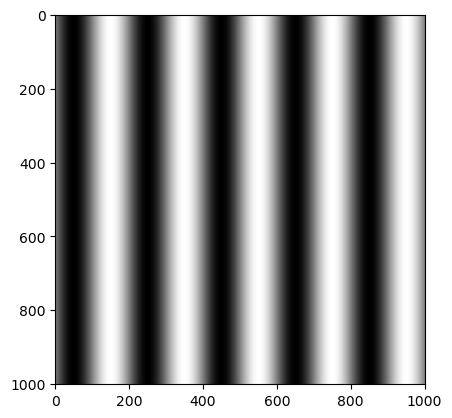

In [92]:
x = np.arange(-500,501,1)
X,Y = np.meshgrid(x,x)
wavelength = 200
grating = np.sin(2*np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

# 2.a Rotated 2D Wave

If you want to rotate the wave by $\pi$ / 9, you would do the following:

`angle = np.pi / 9`

`rotated_grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)`

Plot this rotated grating in the cell below.

# <font color='red'>Student Input Cell: 5 points</font>   

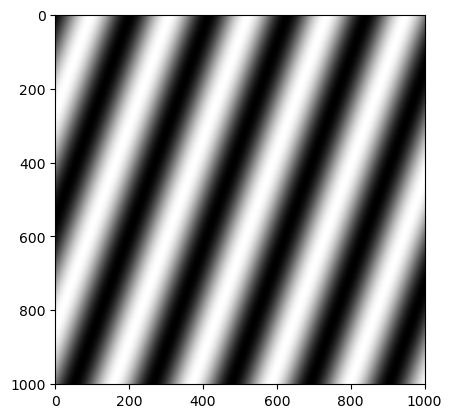

In [93]:
angle = np.pi / 9
rotated_grating = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)
plt.set_cmap("gray")
plt.imshow(rotated_grating)
plt.show()

# 2.c Fourier Transform of Grating

To take the 2D Fourier Transform of your original (non-rotated) grating, use the following code:

`ft = np.fft.ifftshift(grating)`

`ft = np.fft.fft2(ft)`

`ft = np.fft.fftshift(ft)`


Make a function with the above code that takes a 2D image as the input, and returns the fourier transform.

Use the code below to plot the output of your function. **(Note: You need to plot the ABSOLUTE value of the ft, because it is complex).**

`plt.imshow(np.abs(function_output))`

Your frequency data will only be a couple of pixels in a sea of black, so to zoom in on the relevant region, use the following x and y limits:

`plt.xlim([480, 520])`

`plt.ylim([520, 480])  # Note, order is reversed for y`

`plt.show()`

# <font color='red'>Student Input Cell: 5 points</font>   

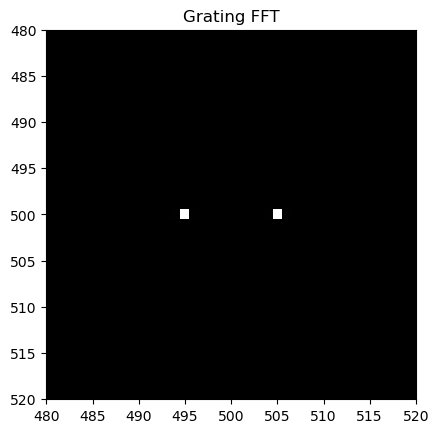

In [94]:
def ft_2d(image):
    return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(image)))

plt.imshow(np.abs(ft_2d(grating)))
plt.title("Grating FFT")
plt.xlim([480,520])
plt.ylim([520,480])
plt.show()

# 2.c Fourier Transform of Rotated Grating

Now plot the 2D Fourier transform of the rotated grating. What do you see?

# <font color='red'>Student Input Cell: 5 points</font>   

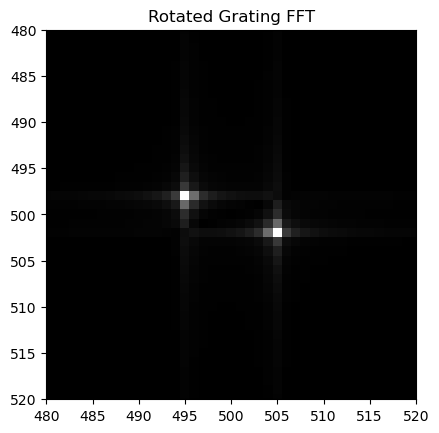

In [95]:
plt.imshow(np.abs(ft_2d(rotated_grating)))
plt.title("Rotated Grating FFT")
plt.xlim([480,520])
plt.ylim([520,480])
plt.show()

In each case the most prominent feature of the image is two brilliant white pixels, but the rotated image results in a smearing of the peaks in both axes.

# 2.d Fourier Transform of Gratings with different frequencies

Now create two more gratings, both with $\lambda$ = 100, but one of them rotated by $\pi$/9 and the other is not rotated.

Plot the 2D Fourier Transform for all 4 gratings ($\lambda$ = 100 & 200) as 4 subplots. How do they compare?

# <font color='red'>Student Input Cell: 10 points</font>   

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3951787606.py:9: SyntaxWarning: invalid escape sequence '\l'
  axs[0,0].set_title("$\lambda$ 200 Grating FFT")
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3951787606.py:13: SyntaxWarning: invalid escape sequence '\l'
  axs[0,1].set_title("$\lambda$ 200 Rotated Grating FFT")
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3951787606.py:17: SyntaxWarning: invalid escape sequence '\l'
  axs[1,0].set_title("$\lambda$ 100 Grating FFT")
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykern

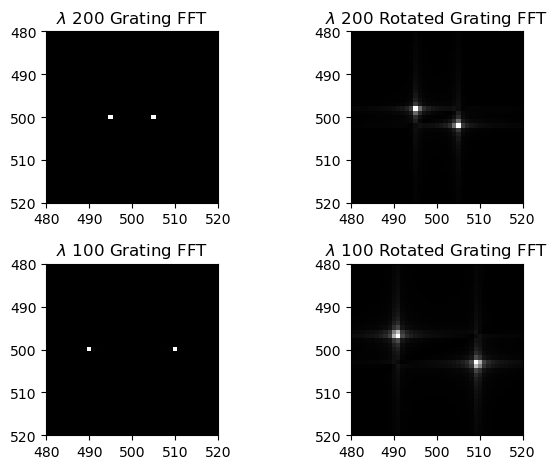

In [96]:
x = np.arange(-500,501,1)
X,Y = np.meshgrid(x,x)
wavelength = 100
grating_100 = np.sin(2*np.pi * X / wavelength)
rotated_grating_100 = np.sin(2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(np.abs(ft_2d(grating)))
axs[0,0].set_title("$\lambda$ 200 Grating FFT")
axs[0,0].set_xlim([480,520])
axs[0,0].set_ylim([520,480])
axs[0,1].imshow(np.abs(ft_2d(rotated_grating)))
axs[0,1].set_title("$\lambda$ 200 Rotated Grating FFT")
axs[0,1].set_xlim([480,520])
axs[0,1].set_ylim([520,480])
axs[1,0].imshow(np.abs(ft_2d(grating_100)))
axs[1,0].set_title("$\lambda$ 100 Grating FFT")
axs[1,0].set_xlim([480,520])
axs[1,0].set_ylim([520,480])
axs[1,1].imshow(np.abs(ft_2d(rotated_grating_100)))
axs[1,1].set_title("$\lambda$ 100 Rotated Grating FFT")
axs[1,1].set_xlim([480,520])
axs[1,1].set_ylim([520,480])
plt.tight_layout()
plt.show()

The lower lambda value results in the peaks of the FFT being located further apart.

# 2.e Fourier Transform of Images

The 2D transform is just like the 1D transform, except you are plotting the frequencies in 2 dimensions.
The center of the transform is frequency = 0. Higher frequencies (both positive and negative) propogate out from the center. Hopefully you saw this in the plots above! This means the low frequency information is near the center of the 2D FT, and the high frequency (details) of an image are distributed toward the edges. The highest frequency (most granular details) are along the perimeter. Let's see what that means for a real image.

**Step 1: Upload the image provided:**

`image = plt.imread(file)`

**Step 2: Convert to grayscale**

`image = image[:, :, :3].mean(axis=2)`

**Step 3: Display the image:**

`plt.imshow(image)`

`plt.axis("off")`

# <font color='red'>Student Input Cell: 5 points</font> 

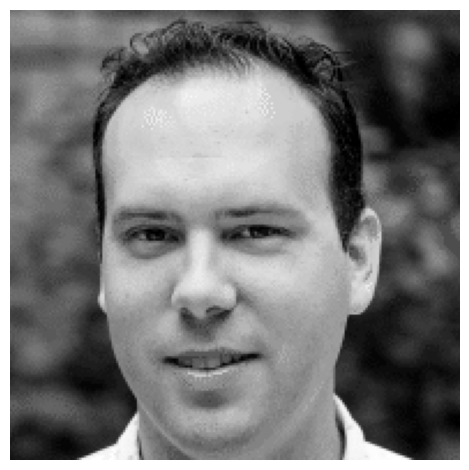

In [97]:
image = plt.imread("/Users/cmdb/Documents/GitHub/qblab2/week7/beautiful_picture_square.png")
image = image[:,:,:3].mean(axis=2)
plt.imshow(image)
plt.axis("off")
plt.tight_layout()
plt.show()

# 2.f Fourier Transform of Images (continued)

Plot the image and the 2D transform of this image side-by-side. However, natural images have power spectra that are exponential, so you should plot the log of the absolute value of the transform (with the gratings, you plotted the absolute of the transform). If you do not plot the log, you will only see the low frequency data (i.e. a single pixel in the middle of a sea of black).


# <font color='red'>Student Input Cell: 5 points</font> 

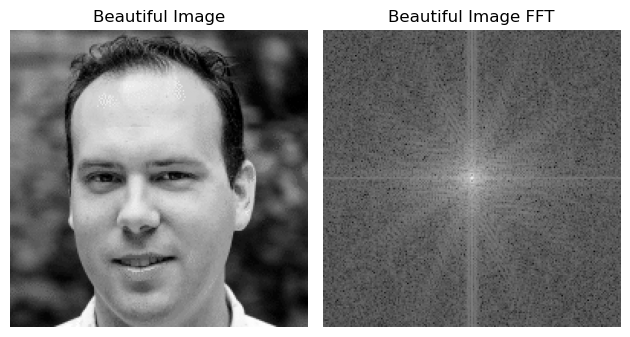

In [98]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[0].axis("off")
axs[0].set_title("Beautiful Image")
axs[1].imshow(np.log(np.abs(ft_2d(image))))
axs[1].axis("off")
axs[1].set_title("Beautiful Image FFT")
plt.tight_layout()
plt.show()

# 2.g Inverse Fourier Transform

Now that you have mastered 2D Fourier Transforms, let's do the inverse. Write a function that takes as input the fourier transform of an image, and returns the inverse transform, using the code below:

`ift = np.fft.ifftshift(ft)`

`ift = np.fft.ifft2(ift)`

`ift = np.fft.fftshift(ift)`

`ift = ift.real`

Once you have this code, plot 3 displays, side by side:

Plot 1: Your rotated grating with wavelength = 200.

Plot 2: The 2D FT of this grating. **Remember to zoom in using the x and y limits you used earlier!**

Plot 3: The Inverse Fourier Transform of the 2D FT.

# <font color='red'>Student Input Cell: 10 points</font> 

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3110450285.py:6: SyntaxWarning: invalid escape sequence '\l'
  axs[0].set_title("$\lambda$ 200\n Rotated Grating")
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3110450285.py:8: SyntaxWarning: invalid escape sequence '\l'
  axs[1].set_title("$\lambda$ 200\n Rotated Grating FFT")
/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3110450285.py:12: SyntaxWarning: invalid escape sequence '\l'
  axs[2].set_title("$\lambda$ 200\n Rotated Grating iFFT")


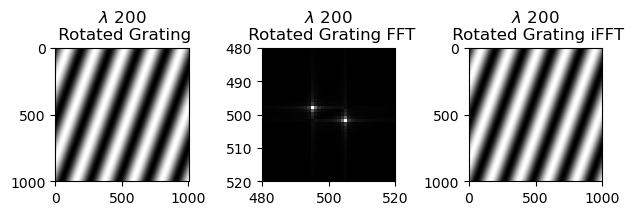

In [99]:
def ift_2d(ft):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(ft))).real

fig, axs = plt.subplots(1, 3)
axs[0].imshow(rotated_grating)
axs[0].set_title("$\lambda$ 200\n Rotated Grating")
axs[1].imshow(np.abs(ft_2d(rotated_grating)))
axs[1].set_title("$\lambda$ 200\n Rotated Grating FFT")
axs[1].set_xlim([480,520])
axs[1].set_ylim([520,480])
axs[2].imshow(ift_2d(ft_2d(rotated_grating)))
axs[2].set_title("$\lambda$ 200\n Rotated Grating iFFT")
plt.tight_layout()
plt.show()

# 2.h Inverse Fourier Transform (continued)

Now plot 3 displays, but for the imported image, it's fourier transform, and its inverse fourier transform.

# <font color='red'>Student Input Cell: 5 points</font> 

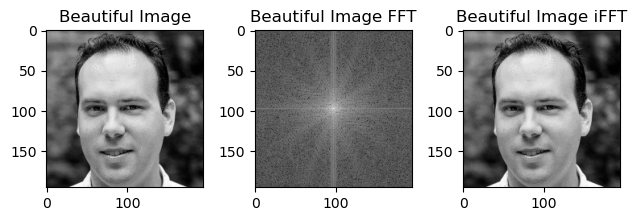

In [100]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image)
axs[0].set_title("Beautiful Image")
axs[1].imshow(np.log(np.abs(ft_2d(image))))
axs[1].set_title("Beautiful Image FFT")
axs[2].imshow(ift_2d(ft_2d(image)))
axs[2].set_title("Beautiful Image iFFT")
plt.tight_layout()
plt.show()

# 2.h Using the Fourier Transform to filter an image / signal

As mentioned earlier, the center of the 2D transform is the low frequency signal, and the outer parts are the higher frequency information. This is why researchers desire X-ray diffracion data that produces diffraction patterns that are as dispersed as possible. A good protein crystal will produce high frequency diffractions, which can then be used to reconstruct the protein structure by taking the inverse Fourier transform of the diffractiond data.

Here, we will do the opposite. We will remove the high frequency data, and see what it does to the image. To do this, we will apply a filter to our 2D Fourier Transform. To make your filter:

**Step 1: Create an array of zeros that has the same dimensions as your 2D Fourier Transform.**

**Step 2: Determine the index of the center pixel (the dimensions should be odd, so there should be a perfectly centered index).**

**Step 3: In the very center of your zero array assign ones to a square region that is 51 x 51 pixels large.**

**Step 4: Make a new array that is the product of your 2D FT and the filter you made in step 3.**

**Step 5: Apply the Inverse Fourier Transform to this newly filtered 2D FT you just made in Step 4.**

**Step 6: Plot 3 displays: the original image, the filtered 2D FT, and the inverse Fourier transform of the filtered 2D Ft.**

# <font color='red'>Student Input Cell: 30 points</font> 

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3826047079.py:21: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(np.abs(filtered_ft)))


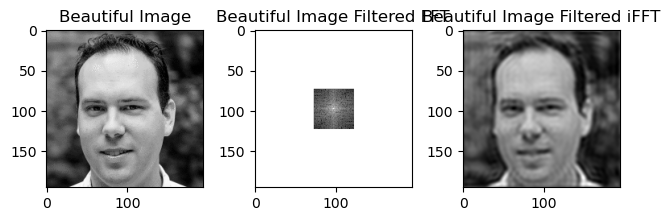

In [101]:
# Step 1
zero_array = np.zeros(ft_2d(image).shape)

# Step 2
center_index = int(np.ceil(zero_array.shape[0] / 2))

# Step 3
filter_array = zero_array
filter_array[center_index-25:center_index+25,center_index-25:center_index+25] = 1

# Step 4
filtered_ft = filter_array * ft_2d(image)

# Step 5
filtered_ifft = ift_2d(filtered_ft)

# Step 6
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image)
axs[0].set_title("Beautiful Image")
axs[1].imshow(np.log(np.abs(filtered_ft)))
axs[1].set_title("Beautiful Image Filtered FFT")
axs[2].imshow(filtered_ifft)
axs[2].set_title("Beautiful Image Filtered iFFT")
plt.tight_layout()
plt.show()

# 2.i Using the Fourier Transform to filter an image / signal (continued)

Wasn't that interesting? You essentially transformed the image which was ~200 x 200 pixels large, down to a square that was only 51 x 51, and that tiny square had enough information to encode most of the image! If you zoom in closely, you'll see that the details of my receding hairline are blurry, because you filtered out these high frequency components.

What you just did is very similar to what is performed for JPEG compression. JPEG images are smaller because you store the wave-transformed version of the image. Any program which can display a jpeg performs an inverse transform on the data in the file.

One last task: What happens if you ignore the LOW frequency information, and only store the high frequency components? To do this, you will make anoher mask, but this time it will be a square of **ONES** and the center 11 x 11 square will be **ZEROS**.

Apply this inverted mask to the image, and display the original image, the masked 2D FT, and the 2D inverse FT.

# <font color='red'>Student Input Cell: 30 points</font> 

/var/folders/m9/f9b1skd55v35_qp4hcflk2qh0000gp/T/ipykernel_58884/3467415925.py:21: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(np.abs(inverted_filtered_ft)))


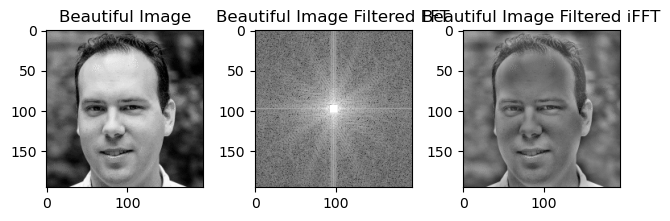

In [102]:
# Step 1
one_array = np.ones(ft_2d(image).shape)

# Step 2
center_index = int(np.ceil(one_array.shape[0] / 2))

# Step 3
inverted_filter_array = one_array
inverted_filter_array[center_index-5:center_index+5,center_index-5:center_index+5] = 0

# Step 4
inverted_filtered_ft = inverted_filter_array * ft_2d(image)

# Step 5
inverted_filtered_ifft = ift_2d(inverted_filtered_ft)

# Step 6
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image)
axs[0].set_title("Beautiful Image")
axs[1].imshow(np.log(np.abs(inverted_filtered_ft)))
axs[1].set_title("Beautiful Image Filtered FFT")
axs[2].imshow(inverted_filtered_ifft)
axs[2].set_title("Beautiful Image Filtered iFFT")
plt.tight_layout()
plt.show()

The result looks bizarre,right? You should see lots of contour edges in the filtered image. This is because sudden changes in pixel intensity which occur at edges are essentially high frequency changes. By only considering high frequency components, you are only retaining the edges of objects in the image. This is how a lot of edge detection algorithms work.

The properties you explored here can be applied to any type of space or time varying data. Smoothing data in space or time can be applied by applying a Fourier transform, and filtering out high frequency components, and then taking the inverse Fourier transfrom of this filtered data to produce a smoother version of the original data.